In [2]:
# %load std_ipython_import.txt
import pandas as pd
import scipy as spy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.mixture import GMM

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
pd.set_option('expand_frame_repr', True)

%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
data = pd.read_csv('data/SAheart.data', sep=',', decimal='.', usecols=np.arange(1,11))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 37.9+ KB


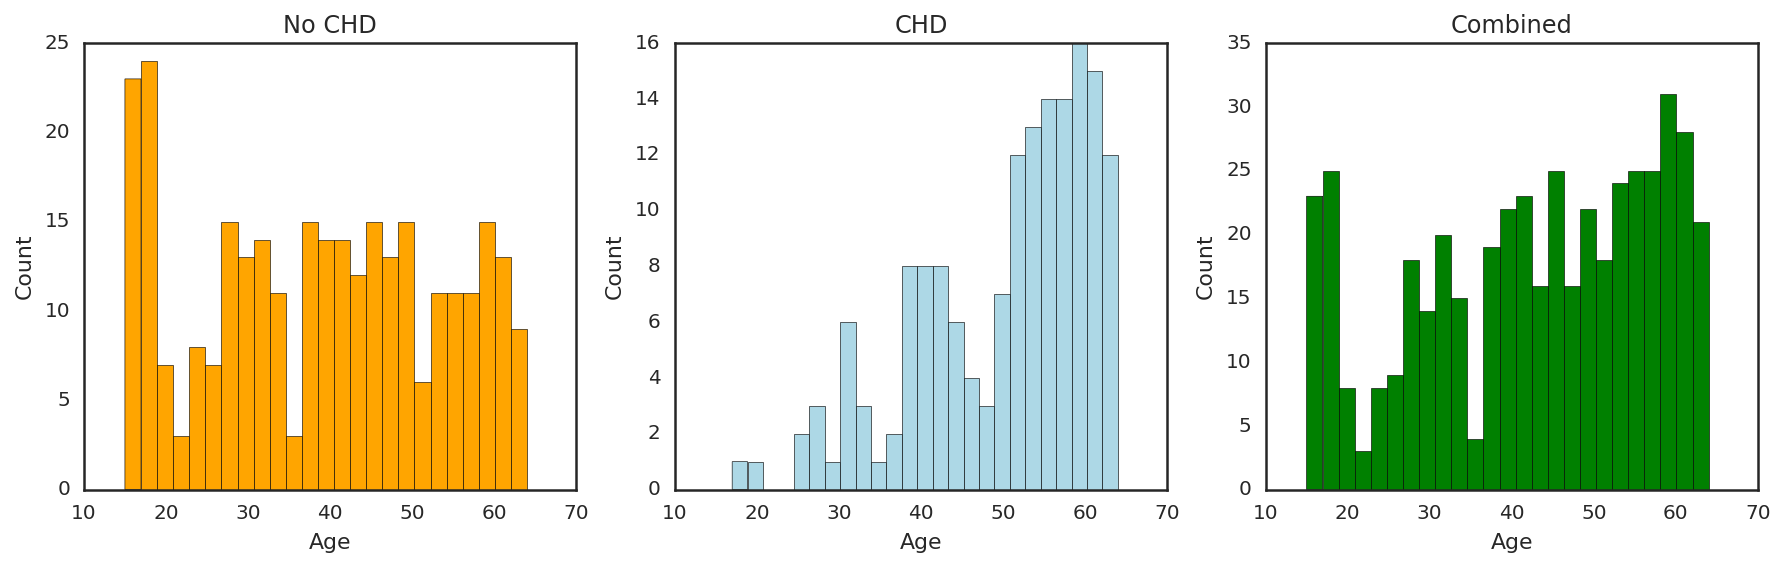

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

ax1.hist(data[data.chd == 0]['age'].values, bins=25, color='orange');
ax1.set_title('No CHD')

ax2.hist(data[data.chd == 1]['age'].values, bins=25, color='lightblue');
ax2.set_title('CHD')

ax3.hist(data.age.values, bins=25, color='g');
ax3.set_title('Combined')

for ax in fig.axes:
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

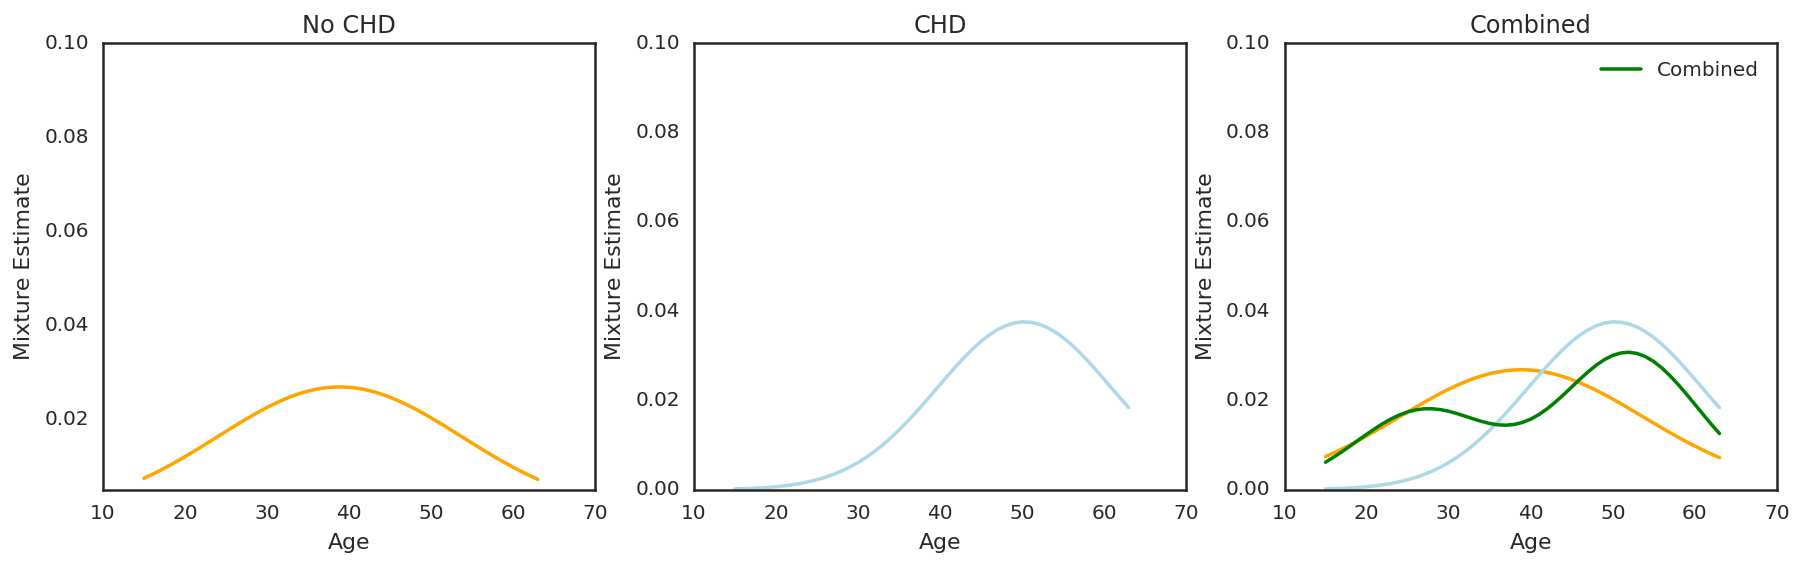

In [96]:
x = np.arange(data.age.min(), data.age.max())
y0 = np.zeros_like(x)
y1 = np.ones_like(x)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

mixm = GMM(n_components=1, covariance_type='tied')
mixm.fit(data[data['chd'] == 0]['age'].as_matrix().reshape(-1,1))
no_chd = np.exp(mixm.score(x.reshape(-1,1)))

mixm.fit(data[data['chd'] == 1]['age'].as_matrix().reshape(-1,1))
chd = np.exp(mixm.score(x.reshape(-1,1)))

mixm.set_params(n_components=2)
mixm.fit(data['age'].as_matrix().reshape(-1,1))
combined = np.exp(mixm.score(x.reshape(-1,1)))

ax1.plot(x, no_chd, c='orange')
ax1.set_title('No CHD')

ax2.plot(x, chd, c='lightblue')
ax2.set_title('CHD')

ax3.plot(x, no_chd, c='orange')
ax3.plot(x, chd, c='lightblue')
ax3.plot(x, combined , c='green', label='Combined')
ax3.set_title('Combined')
ax3.legend()

for ax in fig.axes:
    ax.set_ylim(ymax = 0.10)
    ax.set_xlabel('Age')
    ax.set_ylabel('Mixture Estimate')